In [69]:
import komm
import math

import matplotlib.pyplot as plt


In [70]:
# Reed the file and count the number of occurrences of each character
with open("alice.txt", "r", encoding="utf-8") as file:
    # Ler o arquivo
    text = file.read()
    
    # Create a variable to store the characters and their occurrences
    characters = {}

    for char in text:
        # Check if the character is on the variable
        if char in characters:
            # Increment the character
            characters[char] += 1
        else:
            # Add the character to the variable and set it to 1
            characters[char] = 1
    
    # Order the characters
    sorted_letters = sorted(characters.items())

# Get the letters and occurrences
letters = [letter for letter, occurrences in sorted_letters]
occurrences = [occurrences for letter, occurrences in sorted_letters]

# Print the letters count: 
print("Letters count:", len(letters))

BFR = math.ceil(math.log2(len(letters)))
print("Bits for representation:", BFR)

Letters count: 91
Bits for representation: 7


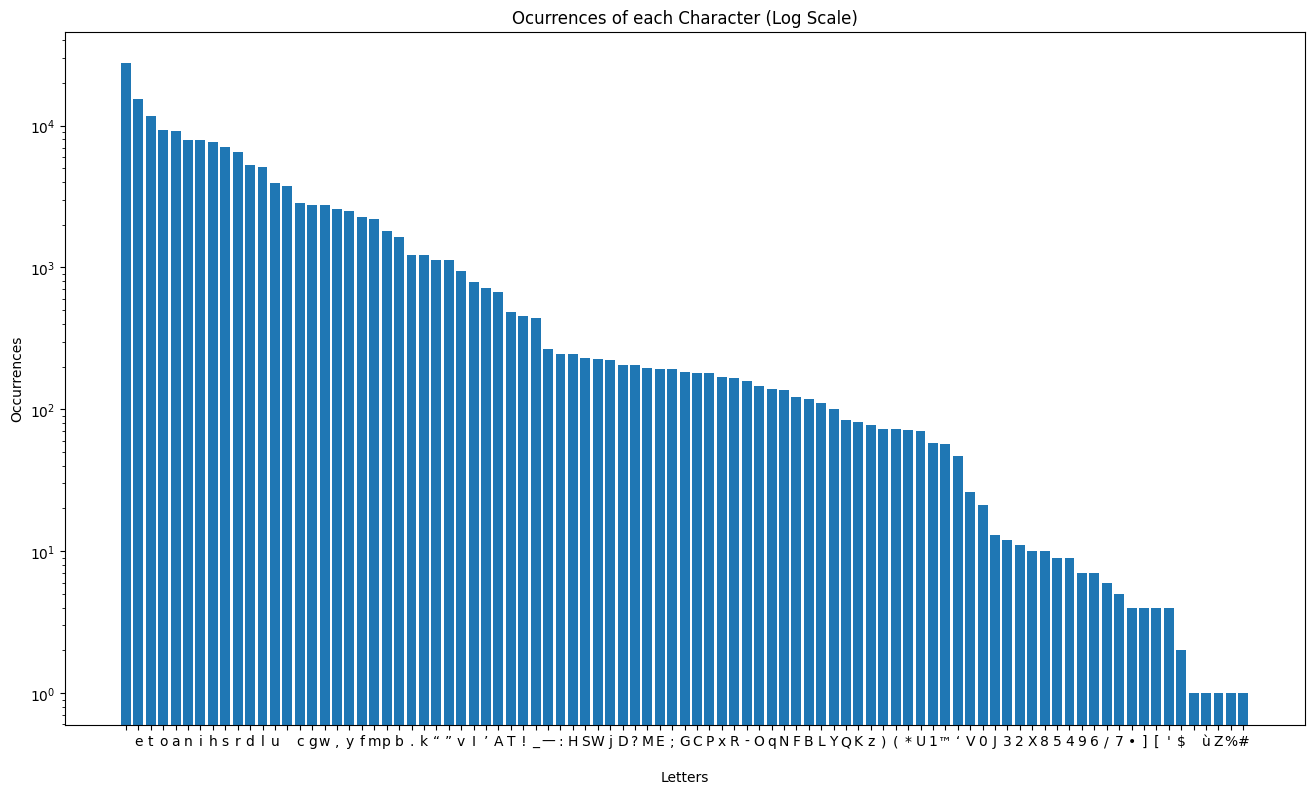

In [71]:
# Create a graph with the results, letters in the x-axis and occurrences in the y-axis


sorted_letters = [letter for _, letter in sorted(zip(occurrences, letters), reverse=True)]

sorted_occurrences = [occurrence for occurrence, _ in sorted(zip(occurrences, letters), reverse=True)]

plt.figure(figsize=(16,9))

plt.bar(sorted_letters, sorted_occurrences)

plt.yscale("log")

plt.xlabel("Letters")

plt.ylabel("Occurrences")

plt.title("Ocurrences of each Character (Log Scale)")

plt.show( )


Total letters: 163919


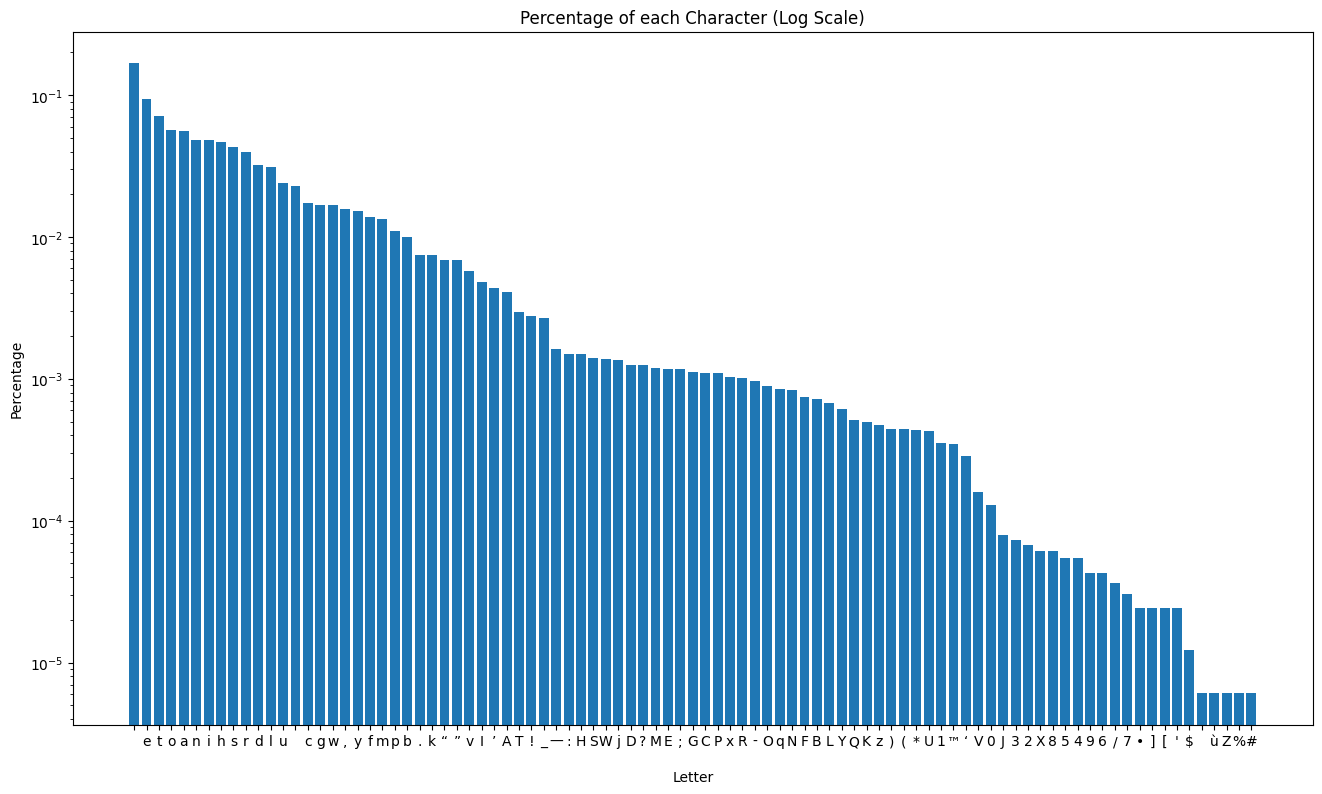

In [72]:
# sum all the occurrences of the letters and create a graph with the percentage of each letter

# Get the total number of letters
total_letters = sum(occurrences)
print("Total letters:", total_letters)

# Calculate the percentage of each letter
def percentage(occurrences, total):
    return [occurrence / total for occurrence in occurrences]

percentages = percentage(occurrences, total_letters)

# sort the letters by occurrences to make the graph more readable
sorted_letters = [letter for _, letter in sorted(zip(occurrences, letters), reverse=True)]
sorted_percentages = [percentage for _, percentage in sorted(zip(occurrences, percentages), reverse=True)]

# Create the gprint("Letters:", letters) graph
plt.figure(figsize=(16,9))
plt.bar(sorted_letters, sorted_percentages)
plt.xlabel("Letter")
plt.ylabel("Percentage")
plt.title("Percentage of each Character (Log Scale)")
plt.yscale("log")
plt.show()


In [73]:
# create a pmf vector with the percentage of each letter

pmf = {letter: percentage for letter, percentage in zip(letters, percentages)}
print("PMF:", list(pmf.values()))

# Calculate the huff code
huff = komm.HuffmanCode(list(pmf.values()))

# Print the huff code values and the huff ratio
print("Huffman code:", huff.codewords)
print("Huff Ratio:", huff.rate(list(pmf.values())))
print("Compress Ratio:", BFR - huff.rate(list(pmf.values())))

PMF: [0.022919856758520978, 0.16838194474100013, 0.00275745947693678, 6.100574064019425e-06, 1.220114812803885e-05, 6.100574064019425e-06, 2.44022962560777e-05, 0.00044534190667341796, 0.00044534190667341796, 0.00043924133260939856, 0.015672374770465902, 0.000963890702115069, 0.007461002080295756, 3.660344438411654e-05, 0.0001281120553444079, 0.0003538332957131266, 6.710631470421366e-05, 7.320688876823309e-05, 5.490516657617482e-05, 5.490516657617482e-05, 4.2704018448135966e-05, 3.0502870320097122e-05, 6.1005740640194244e-05, 4.2704018448135966e-05, 0.0015007412197487783, 0.001177410794355749, 0.0012445171090599626, 0.004087384622893014, 0.0007198677395542921, 0.0011042039055875158, 0.0012567182571880013, 0.001177410794355749, 0.0007503706098743891, 0.0011103044796515352, 0.001494640645684759, 0.004782850066191229, 7.930746283225251e-05, 0.0004941464991855734, 0.0006771637211061561, 0.0011957125165478072, 0.0008296780727066417, 0.0008906838133468359, 0.0010981033315234964, 0.0005124482

In [74]:
# create a index of PMF, using number and the letter:

index = {i: letter for i, letter in enumerate(letters)}
print("Index:", index)

Index: {0: '\n', 1: ' ', 2: '!', 3: '#', 4: '$', 5: '%', 6: "'", 7: '(', 8: ')', 9: '*', 10: ',', 11: '-', 12: '.', 13: '/', 14: '0', 15: '1', 16: '2', 17: '3', 18: '4', 19: '5', 20: '6', 21: '7', 22: '8', 23: '9', 24: ':', 25: ';', 26: '?', 27: 'A', 28: 'B', 29: 'C', 30: 'D', 31: 'E', 32: 'F', 33: 'G', 34: 'H', 35: 'I', 36: 'J', 37: 'K', 38: 'L', 39: 'M', 40: 'N', 41: 'O', 42: 'P', 43: 'Q', 44: 'R', 45: 'S', 46: 'T', 47: 'U', 48: 'V', 49: 'W', 50: 'X', 51: 'Y', 52: 'Z', 53: '[', 54: ']', 55: '_', 56: 'a', 57: 'b', 58: 'c', 59: 'd', 60: 'e', 61: 'f', 62: 'g', 63: 'h', 64: 'i', 65: 'j', 66: 'k', 67: 'l', 68: 'm', 69: 'n', 70: 'o', 71: 'p', 72: 'q', 73: 'r', 74: 's', 75: 't', 76: 'u', 77: 'v', 78: 'w', 79: 'x', 80: 'y', 81: 'z', 82: 'ù', 83: '—', 84: '‘', 85: '’', 86: '“', 87: '”', 88: '•', 89: '™', 90: '\ufeff'}


In [75]:
# encode the text using the index to create a integer index of the letters in the text

encoded_text = [list(index.keys())[list(index.values()).index(letter)] for letter in text]

print("Encoded text:", decoded_text[:100])

# create a huffman code for the encoded text

huff_encoded = huff.encode(encoded_text)

print("Huffman encoded text:", huff_encoded)

Encoded text: ['T', 'h', 'e', 'P', 'r', 'o', 'j', 'e', 'c', 't', 'G', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', 'e', 'B', 'o', 'o', 'k', 'o', 'f', 'A', 'l', 'i', 'c', 'e', 's', 'A', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', 'i', 'n', 'W', 'o', 'n', 'd', 'e', 'r', 'l', 'a', 'n', 'd', 'T', 'h', 'i', 's', 'e', 'b', 'o', 'o', 'k', 'i', 's', 'f', 'o', 'r', 't', 'h', 'e', 'u', 's', 'e', 'o', 'f', 'a', 'n', 'y', 'o', 'n', 'e', 'a', 'n', 'y', 'w', 'h', 'e', 'r', 'e', 'i', 'n', 't', 'h', 'e', 'U', 'n', 'i', 't', 'e']
Huffman encoded text: [0 1 0 ... 0 0 1]


In [76]:
# export the huffman code to a file.

# binary_string = komm.bits_to_int(huff_encoded.reshape(-1,8))

with open("huff_encoded.com2", "w") as file:
    file.write("".join(map(str, huff_encoded)))

# PROCESSO DE DECODIFICACAO


In [77]:
# read the huffman code from the file

with open("huff_encoded.com2", "r") as file:
    huff_encoded = file.read()

# decode the huffman code
huffDecode = komm.HuffmanCode(list(pmf.values()))
print("Huffman code:", huffDecode.codewords)


Huffman code: [(0, 0, 0, 0, 0, 1), (0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1, 1), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1), (0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0), (0, 1, 1, 1, 0, 0), (0, 1, 0, 1, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 0, 0), (0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1), (0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1), (0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1), (0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0), (0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 1, 1, 1

In [78]:
# Decode the encoded text

# Convert the string back to a list of integers
huff_encoded_list = list(map(int, huff_encoded))

decoded_text = huffDecode.decode(huff_encoded_list)

# print more values of the decoded text
print("Decoded text:", decoded_text[:100])

Decoded text: [90 46 63 60  1 42 73 70 65 60 58 75  1 33 76 75 60 69 57 60 73 62  1 60
 28 70 70 66  1 70 61  1 27 67 64 58 60  6 74  1 27 59 77 60 69 75 76 73
 60 74  1 64 69  1 49 70 69 59 60 73 67 56 69 59  0  1  1  1  1  0 46 63
 64 74  1 60 57 70 70 66  1 64 74  1 61 70 73  1 75 63 60  1 76 74 60  1
 70 61  1 56]


In [79]:
# use the index to convert the integers back to letters, the index need to check all the values of the index to find the letter

decoded_text = [index[i] for i in decoded_text]

print("Decoded text:", decoded_text[:100])

Decoded text: ['\ufeff', 'T', 'h', 'e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'G', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'B', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'A', 'l', 'i', 'c', 'e', "'", 's', ' ', 'A', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'W', 'o', 'n', 'd', 'e', 'r', 'l', 'a', 'n', 'd', '\n', ' ', ' ', ' ', ' ', '\n', 'T', 'h', 'i', 's', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'i', 's', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'u', 's', 'e', ' ', 'o', 'f', ' ', 'a']


In [80]:
# print the text into a file "huff_decoded.txt"

with open("huff_decoded.txt", "w") as file:
    file.write("".join(decoded_text))
    